In [1]:
# LOAN APPROVAL

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
loan_df = pd.read_csv("C:/Users/padma/Desktop/College/Sem6/ML/a1/Dataset/loan_approval_dataset.csv")

# Clean column names
loan_df.columns = loan_df.columns.str.strip()

loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
loan_df.info()
print(loan_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
(4269, 13)


In [5]:
loan_df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [6]:
for col in loan_df.columns:
    if loan_df[col].dtype == 'object':
        loan_df[col] = loan_df[col].fillna(loan_df[col].mode()[0])
    else:
        loan_df[col] = loan_df[col].fillna(loan_df[col].mean())

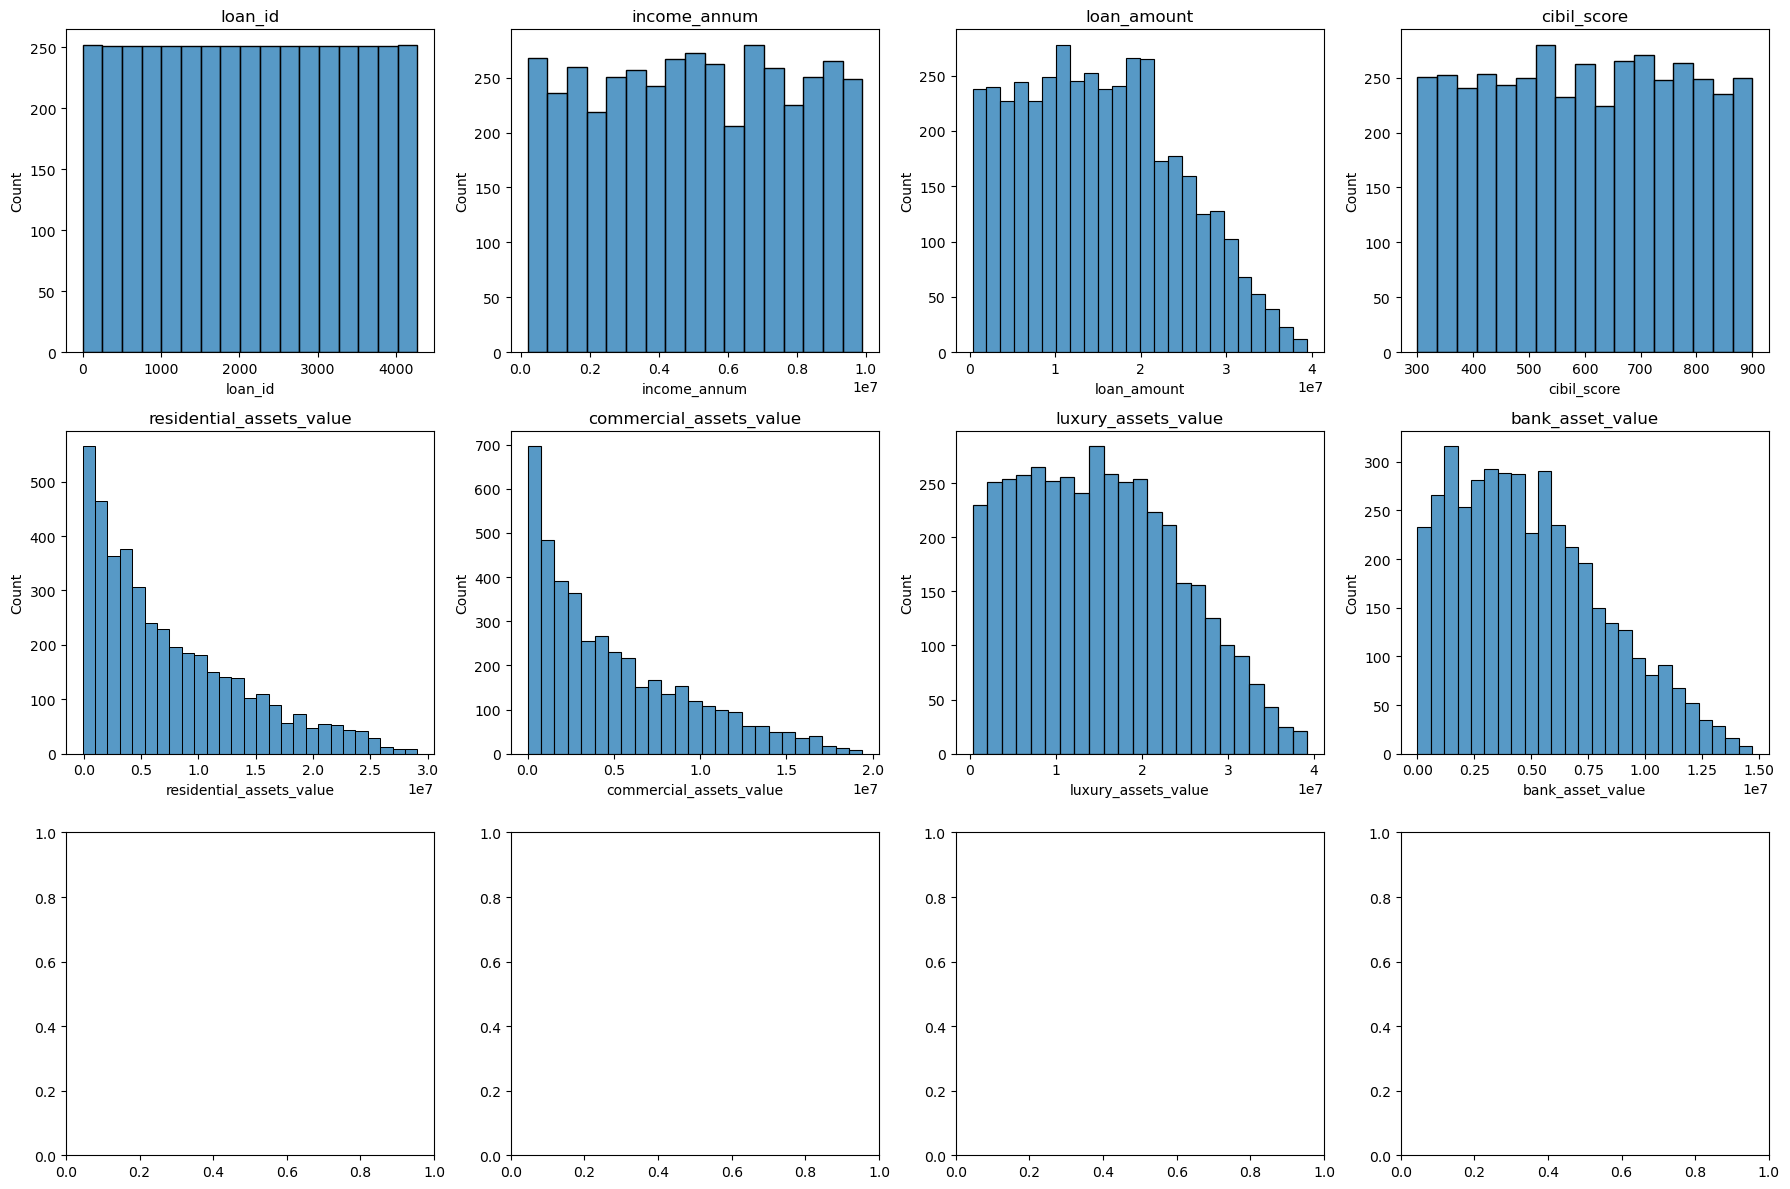

In [7]:
num_cols = [
    col for col in loan_df.select_dtypes(include="number").columns
    if loan_df[col].nunique() > 10
]

fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(loan_df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

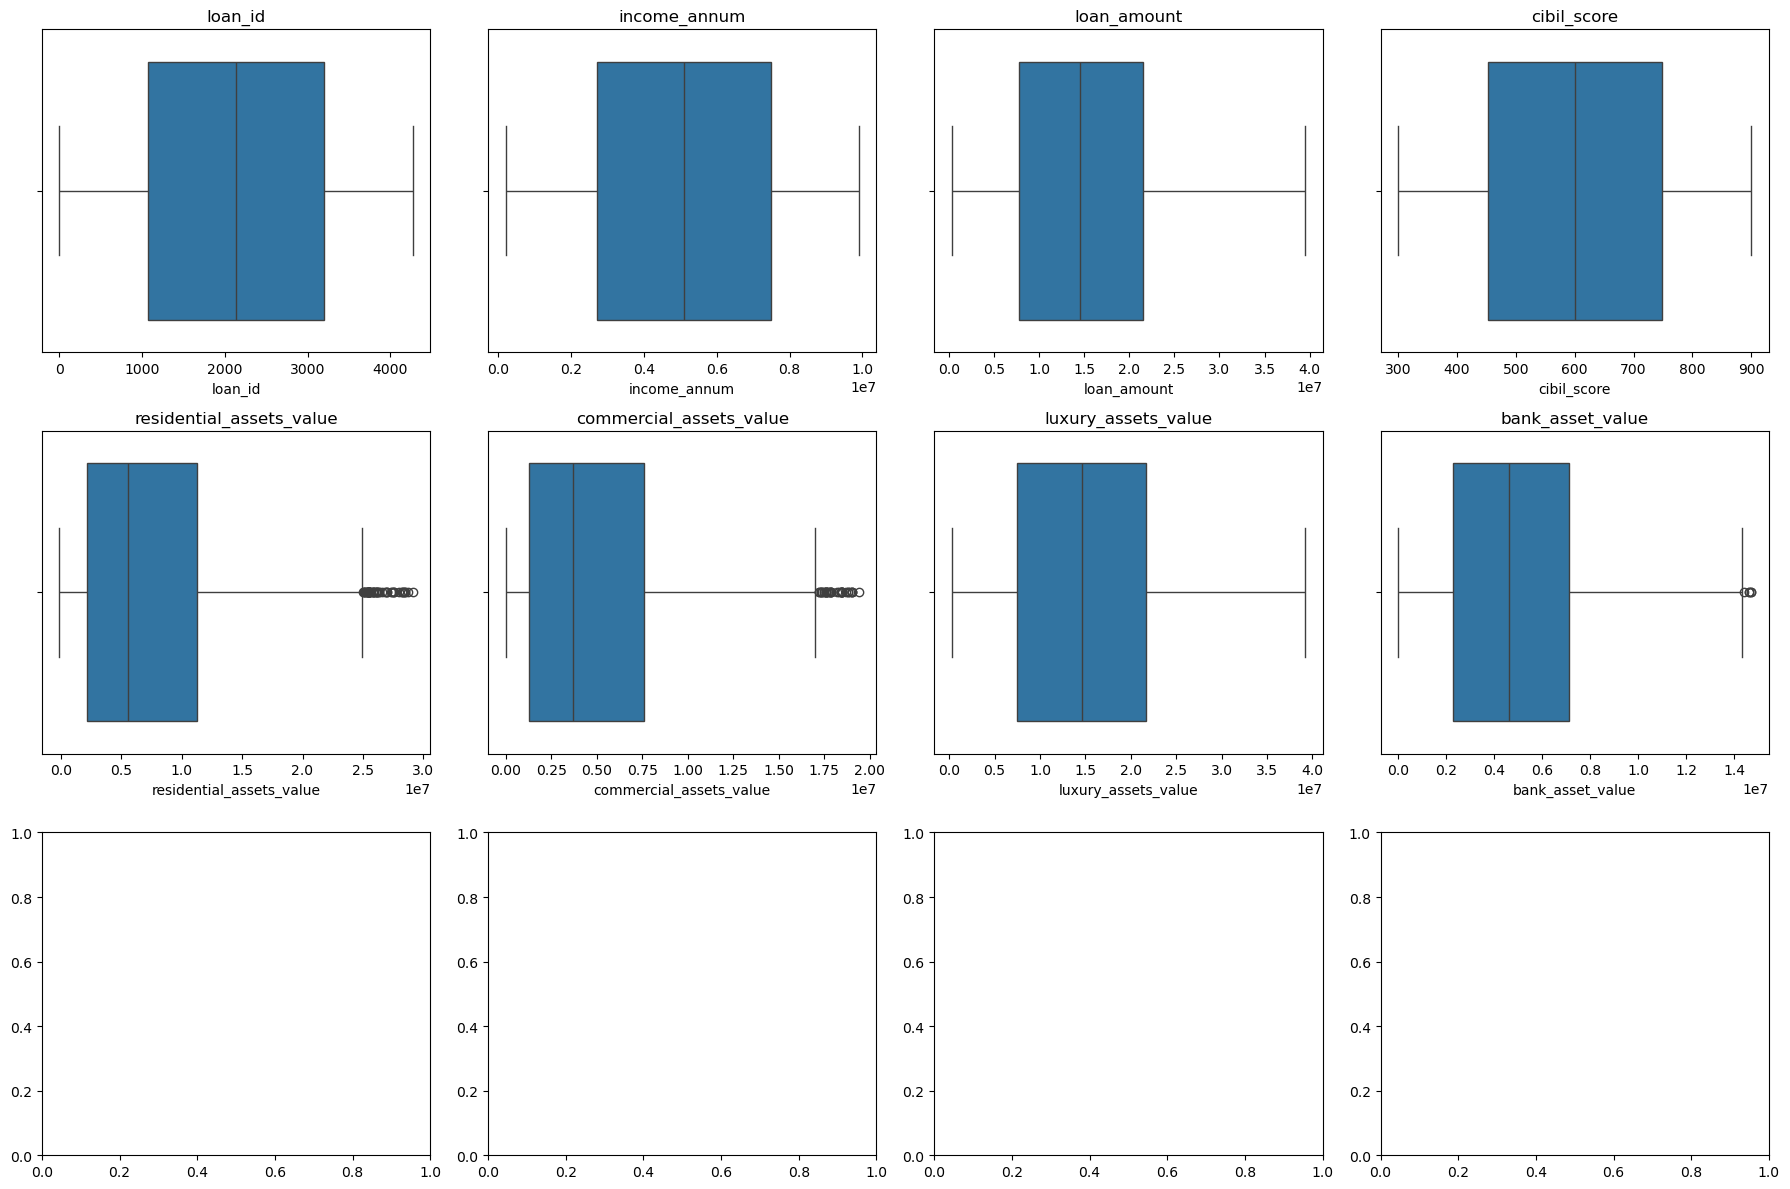

In [8]:
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=loan_df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [9]:
le = LabelEncoder()
for col in loan_df.columns:
    if loan_df[col].dtype == "object":
        loan_df[col] = le.fit_transform(loan_df[col])

In [10]:
X = loan_df.drop("loan_status", axis=1)
y = loan_df["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [11]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]
selected_features


Index(['loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value'],
      dtype='object')

In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.transform(X_test[selected_features])


In [13]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9250585480093677

Confusion Matrix:
 [[508  23]
 [ 41 282]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       531
           1       0.92      0.87      0.90       323

    accuracy                           0.93       854
   macro avg       0.92      0.91      0.92       854
weighted avg       0.93      0.93      0.92       854



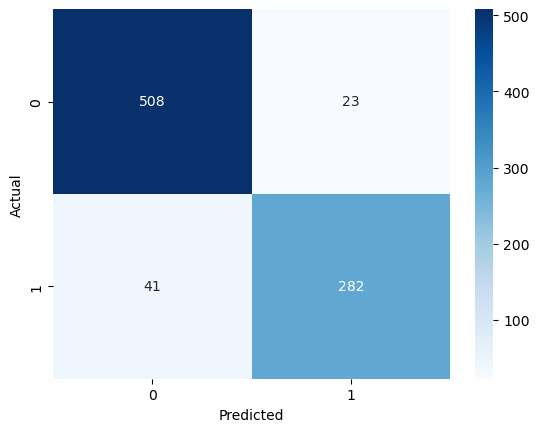

In [15]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
loan_df['loan_status'].value_counts()

loan_status
0    2656
1    1613
Name: count, dtype: int64

In [17]:
# IRIS DATASET

In [18]:
iris_df = pd.read_csv("C:/Users/padma/Desktop/College/Sem6/ML/a1/Dataset/Iris.csv")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
print(iris_df.shape)
print(iris_df.info())
print(iris_df.describe())
print(iris_df.isna().sum())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000   

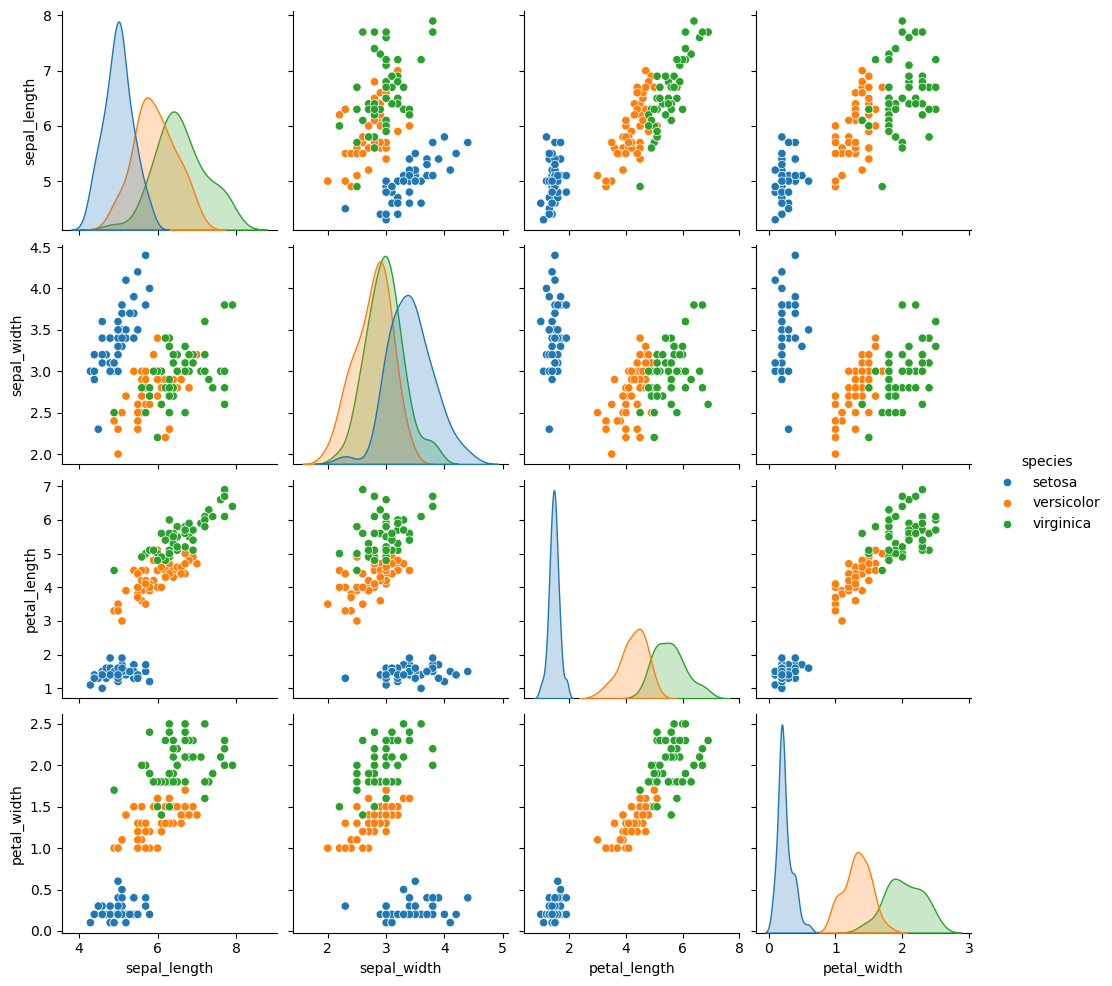

In [20]:
sns.pairplot(iris_df, hue="species")
plt.show()

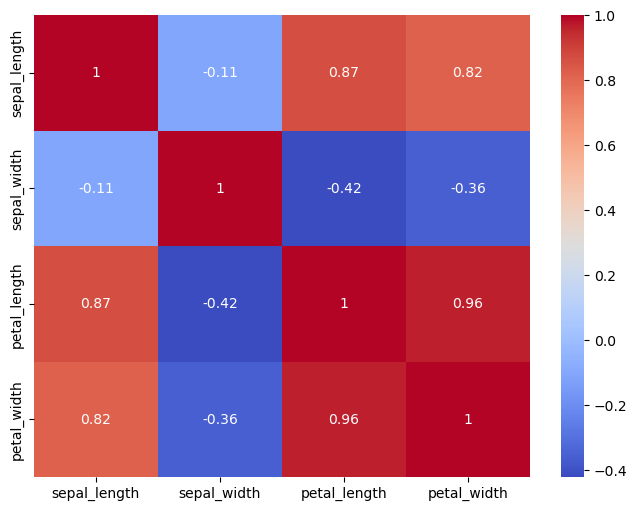

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(
    iris_df.select_dtypes(include='number').corr(),
    annot=True,
    cmap="coolwarm"
)
plt.show()

In [22]:
le = LabelEncoder()
iris_df["species"] = le.fit_transform(iris_df["species"])
X = iris_df.drop("species", axis=1)
y = iris_df["species"]


In [23]:
selector = SelectKBest(score_func=f_classif, k=4)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
selected_features


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features],
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
model = LogisticRegression(multi_class="auto", max_iter=200)
model.fit(X_train_scaled, y_train)


C:\Users\padma\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'auto'


In [27]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9333333333333333

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



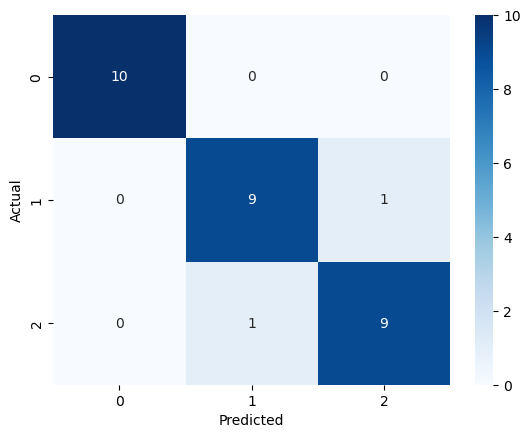

In [28]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [29]:
# DIABETES

In [30]:
dia_df = pd.read_csv("C:/Users/padma/Desktop/College/Sem6/ML/a1/Dataset/diabetes_prediction_dataset.csv")
dia_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [31]:
print(dia_df.shape)
dia_df.info()
print(dia_df.describe())
print(dia_df.isna().sum())

(100000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593   

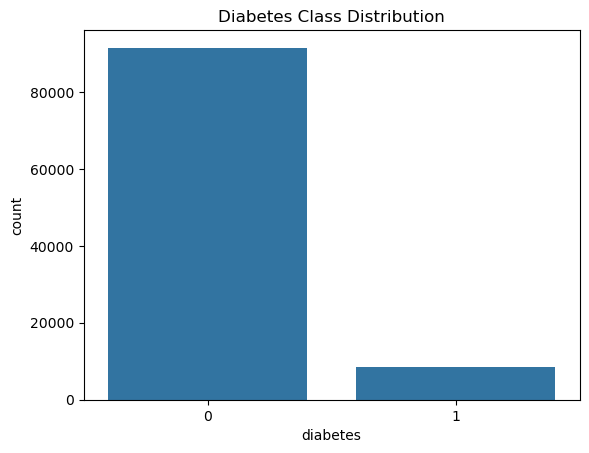

In [32]:
sns.countplot(x="diabetes", data=dia_df)
plt.title("Diabetes Class Distribution")
plt.show()

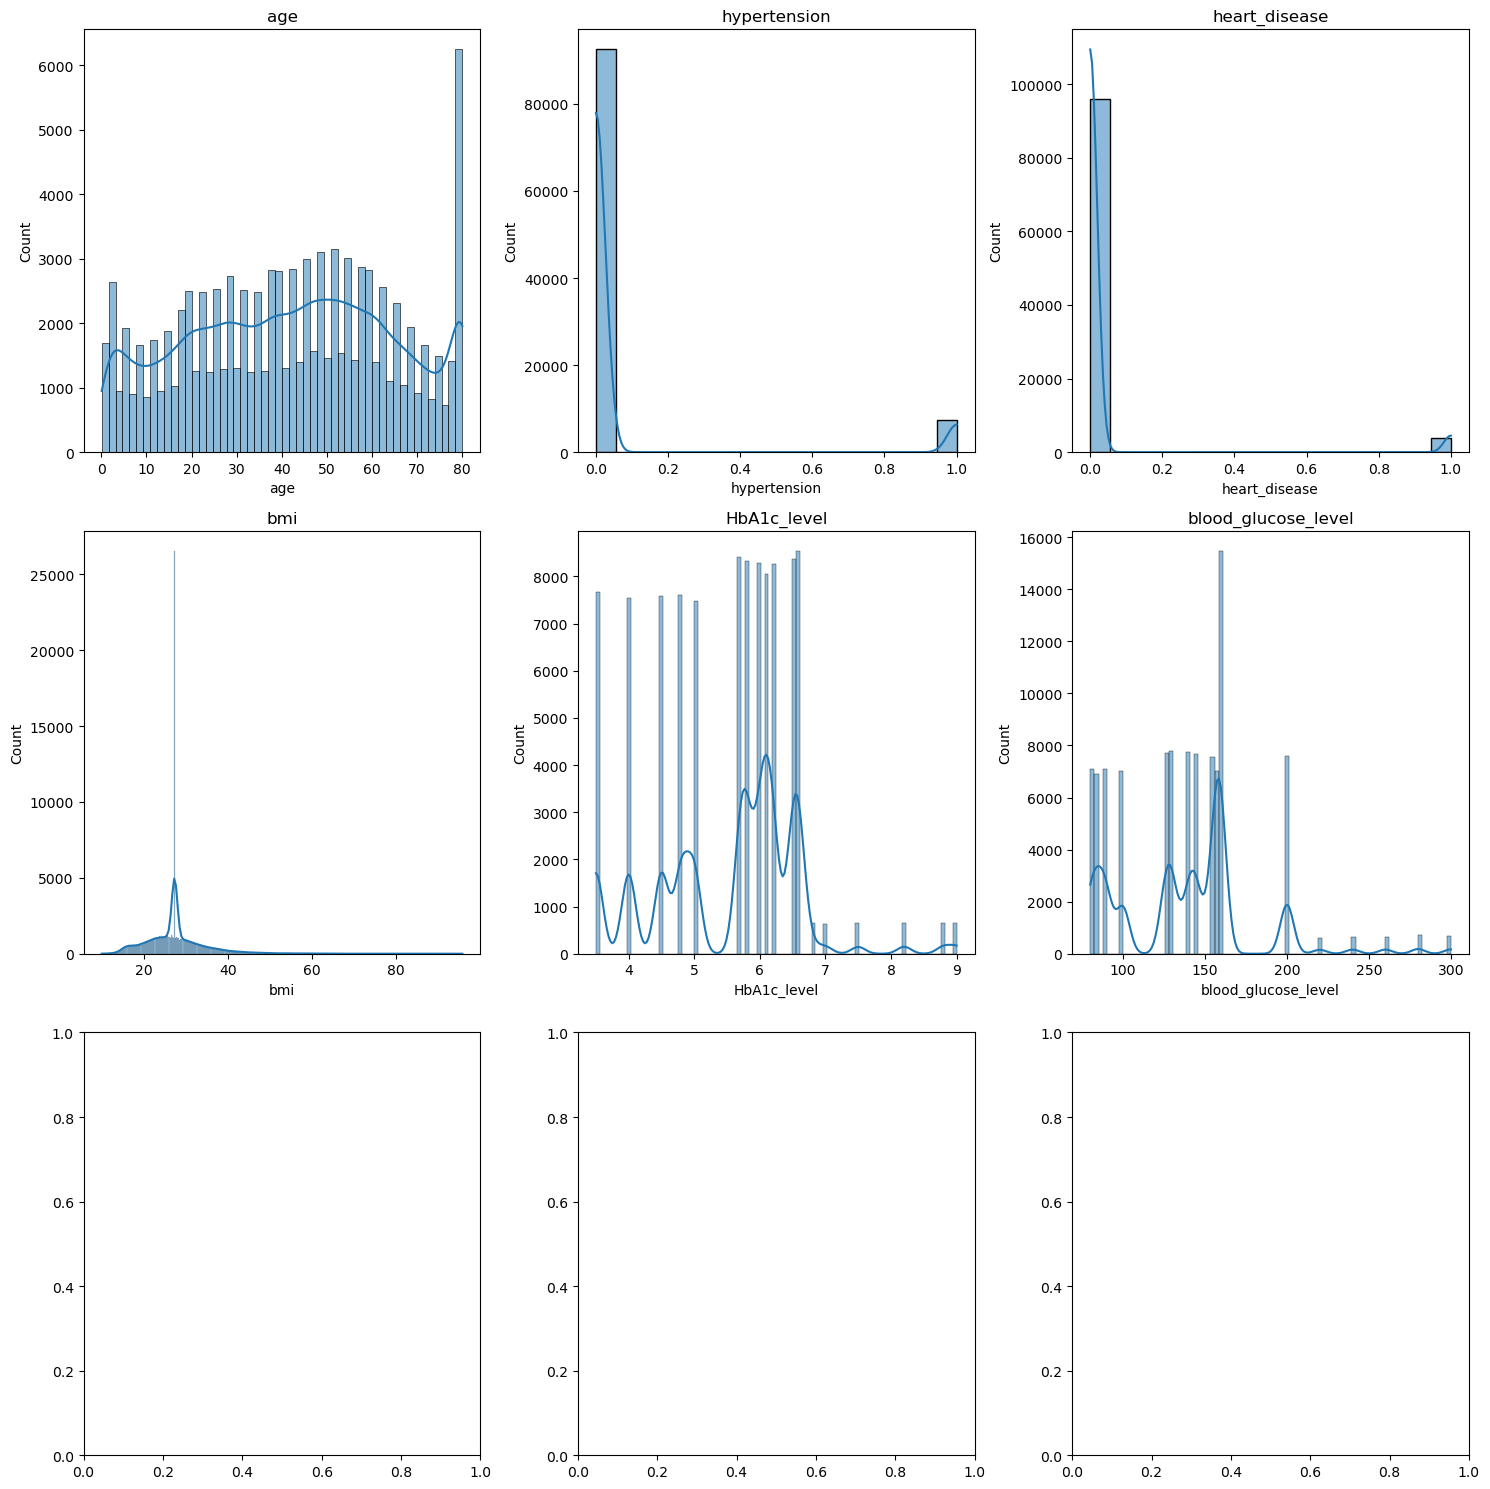

In [33]:
num_cols = dia_df.select_dtypes(include="number").columns.tolist()
num_cols.remove("diabetes")

fig, axes = plt.subplots(len(num_cols)//3 + 1, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(dia_df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

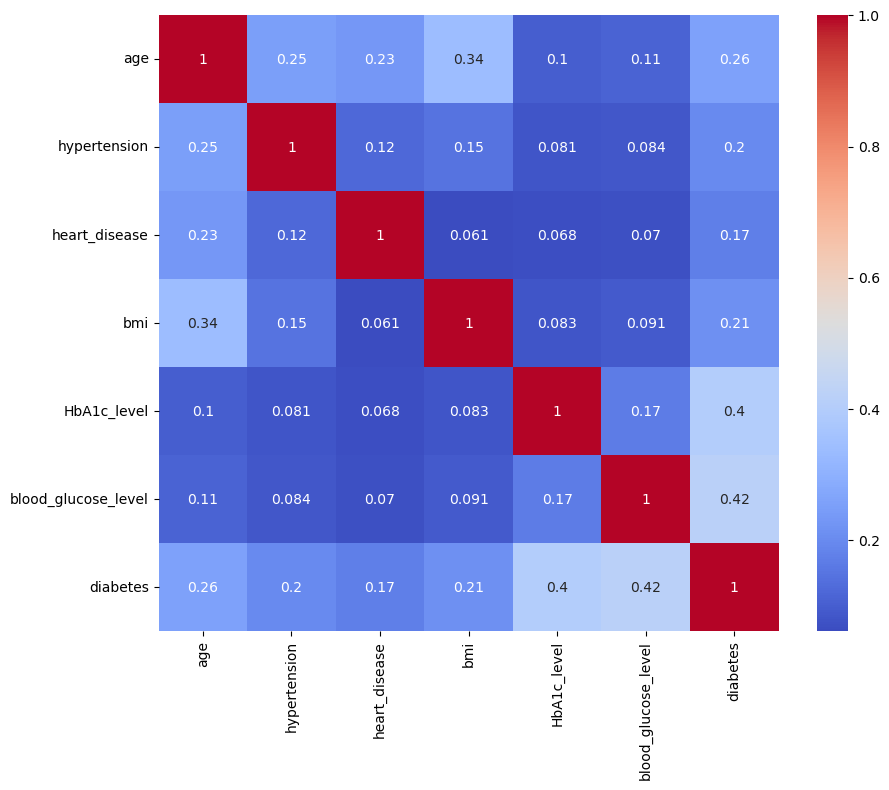

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(dia_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()


# -------- Handle Missing Values --------
for col in dia_df.columns:
    if dia_df[col].dtype == "object":
        dia_df[col] = dia_df[col].fillna(dia_df[col].mode()[0])
    else:
        dia_df[col] = dia_df[col].fillna(dia_df[col].mean())

In [35]:
le = LabelEncoder()
for col in dia_df.select_dtypes(include="object").columns:
    dia_df[col] = le.fit_transform(dia_df[col])


# -------- Feature Selection (ANOVA) --------
X = dia_df.drop("diabetes", axis=1)
y = dia_df["diabetes"]

selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))

Selected Features: ['age', 'hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level']


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features],
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
model = LogisticRegression(class_weight="balanced")
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [39]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.88475

Confusion Matrix:
 [[16185  2115]
 [  190  1510]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93     18300
           1       0.42      0.89      0.57      1700

    accuracy                           0.88     20000
   macro avg       0.70      0.89      0.75     20000
weighted avg       0.94      0.88      0.90     20000



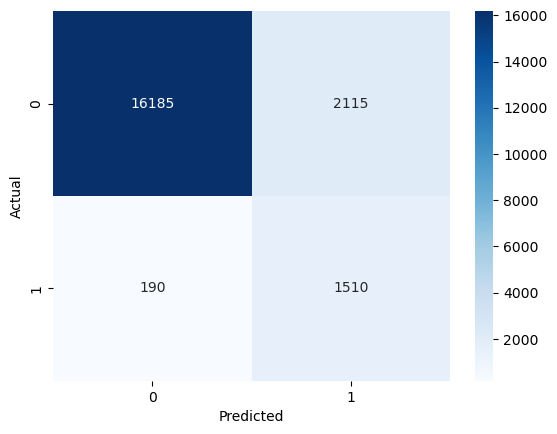

In [40]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [41]:
# EMAIL SPAM

In [42]:
email_df = pd.read_csv("C:/Users/padma/Desktop/College/Sem6/ML/a1/Dataset/emails.csv")
email_df = email_df.drop(columns=["Email No."])
email_df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [43]:
print(email_df.shape)
email_df.info()
print(email_df.isna().sum())

(5172, 3001)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, the to Prediction
dtypes: int64(3001)
memory usage: 118.4 MB
the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64


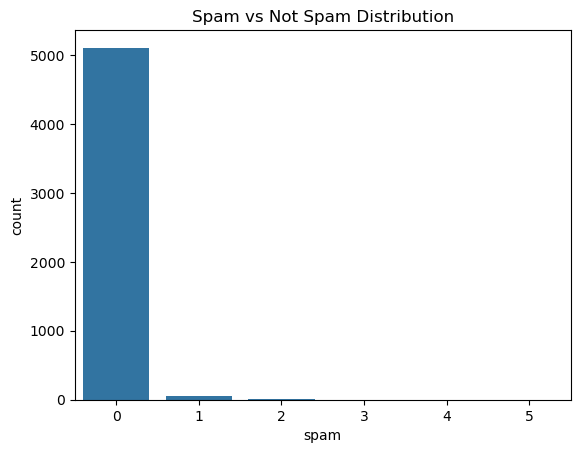

In [44]:
sns.countplot(x="spam", data=email_df)
plt.title("Spam vs Not Spam Distribution")
plt.show()

In [45]:
X = email_df.drop("spam", axis=1)
y = email_df["spam"]

In [46]:
selector = SelectKBest(score_func=f_classif, k=1000)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Feature Count:", len(selected_features))

Selected Feature Count: 1000


In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features],
    y,
    test_size=0.2,
    random_state=42
)

In [48]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [50]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9951690821256038

Confusion Matrix:
 [[1021    3]
 [   2    9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1024
           1       0.75      0.82      0.78        11

    accuracy                           1.00      1035
   macro avg       0.87      0.91      0.89      1035
weighted avg       1.00      1.00      1.00      1035



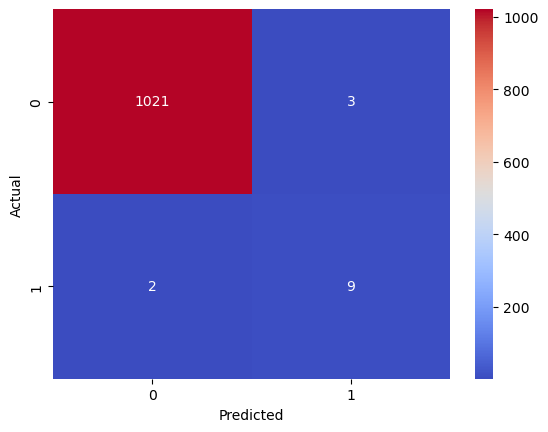

In [51]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="coolwarm"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [52]:
#HANDWRITTEN RECOGNITION

In [53]:
import os
from tensorflow.keras.utils import to_categorical

base_path = "C:/Users/padma/Desktop/College/Sem6/ML/a1/Dataset"
csv_path = os.path.join(base_path, "english.csv")

C:\Users\padma\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [54]:
df = pd.read_csv(csv_path)
print(df.head())
print(df.columns)

                image label
0  Img/img001-001.png     0
1  Img/img001-002.png     0
2  Img/img001-003.png     0
3  Img/img001-004.png     0
4  Img/img001-005.png     0
Index(['image', 'label'], dtype='object')


In [55]:
import cv2

IMG_SIZE = 32
X = []
y = []

for i in range(len(df)):
    img_path = os.path.join(base_path, df.loc[i, "image"])
    label = df.loc[i, "label"]

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    X.append(img)
    y.append(label)


X = np.array(X, dtype="float32") / 255.0
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [56]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(y_cat.shape[1], activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

C:\Users\padma\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 62)                  │           7,998 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321,854 (1.23 MB)

 Trainable params: 321,854 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=15,
    batch_size=32,
    verbose=1
)

Epoch 1/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0183 - loss: 4.1243 - val_accuracy: 0.0256 - val_loss: 4.0623
Epoch 2/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0619 - loss: 3.8602 - val_accuracy: 0.1612 - val_loss: 3.5329
Epoch 3/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1727 - loss: 3.2621 - val_accuracy: 0.3443 - val_loss: 2.6628
Epoch 4/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2851 - loss: 2.6468 - val_accuracy: 0.4689 - val_loss: 2.1934
Epoch 5/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3735 - loss: 2.2916 - val_accuracy: 0.5568 - val_loss: 1.8103
Epoch 6/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4265 - loss: 2.0105 - val_accuracy: 0.5751 - val_loss: 1.7085
Epoch 7/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4908 - loss: 1.7643 - val_accuracy: 0.6081 - val_loss: 1.5119
Epoch 8/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5393 - loss: 1.6202 - val_accuracy: 0.6447 - val_loss:

In [61]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.6583577990531921


In [62]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


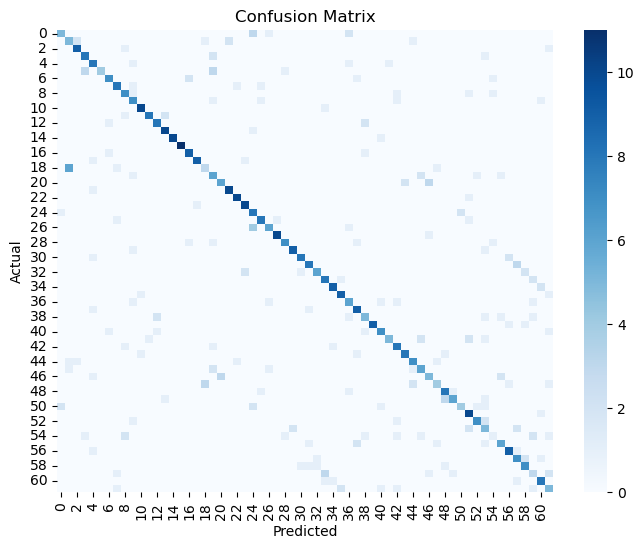

In [63]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [65]:

print(classification_report(y_true, y_pred))



              precision    recall  f1-score   support

           0       0.62      0.45      0.53        11
           1       0.38      0.45      0.42        11
           2       0.75      0.82      0.78        11
           3       0.67      0.73      0.70        11
           4       0.57      0.73      0.64        11
           5       1.00      0.36      0.53        11
           6       0.70      0.64      0.67        11
           7       0.67      0.73      0.70        11
           8       0.58      0.64      0.61        11
           9       0.50      0.64      0.56        11
          10       0.83      0.91      0.87        11
          11       0.89      0.73      0.80        11
          12       0.73      0.73      0.73        11
          13       0.77      0.91      0.83        11
          14       1.00      0.91      0.95        11
          15       1.00      1.00      1.00        11
          16       0.75      0.82      0.78        11
          17       0.90    